In [12]:
import numpy as np
import pandas as pd
import preprocessing
import shared_constants
from data_reading.phyphox import get_experiments, read_experiment
from features import compute_and_visualize_motifs, motif_count_mean
%matplotlib inline


# down sampling rate: we use every nth sample
listening_rate = 10

experiments = get_experiments()
data_frame = read_experiment(experiments[0])
data_frame = preprocessing.align_data(data_frame, listening_rate=listening_rate)

# calculate auto-correlation coefficients for acceleration
_regex = "{sensor_name}_{dimension}".format(sensor_name="acceleration",
                                            dimension=shared_constants.DIMENSIONS_KEY_LIST)
acceleration_data_frame = data_frame.filter(regex=_regex, axis=1)
# calculate auto-correlation coefficients for gyroscope
_regex = "{sensor_name}_{dimension}".format(sensor_name="gyroscope", dimension=shared_constants.DIMENSIONS_KEY_LIST)
gyroscope_data_frame = data_frame.filter(regex=_regex, axis=1)

/Users/julio/Documents/Uni/5_Master/Master Project/mp-mental-health-2020/src/preprocessing/_data_frame.py:31: FutureWarning: Passing datetime64-dtype data to TimedeltaIndex is deprecated, will raise a TypeError in a future version
  time_delta_index = pd.TimedeltaIndex(timestamp_to_date, unit=output_timestamp_unit)


In [13]:
# analyze the matrix profile for actions that take between 3 and 10 seconds
windows = list(range(300,1000,100))

## Create matrix profiles for each accelerometer and gyro dimension

Look at time windows of 3 to 10 seconds

### Acceleration x

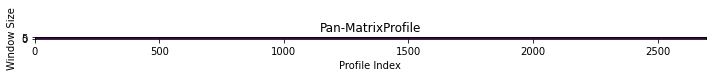

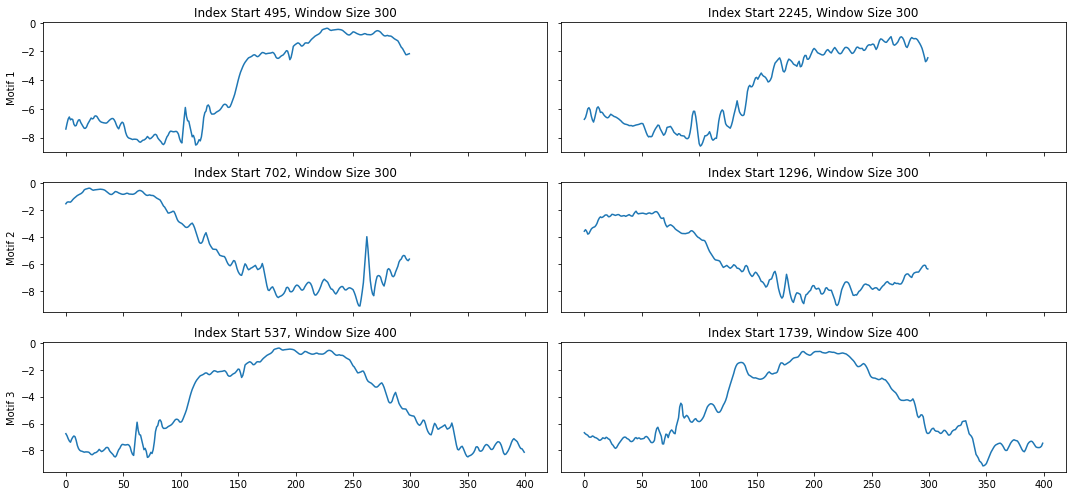

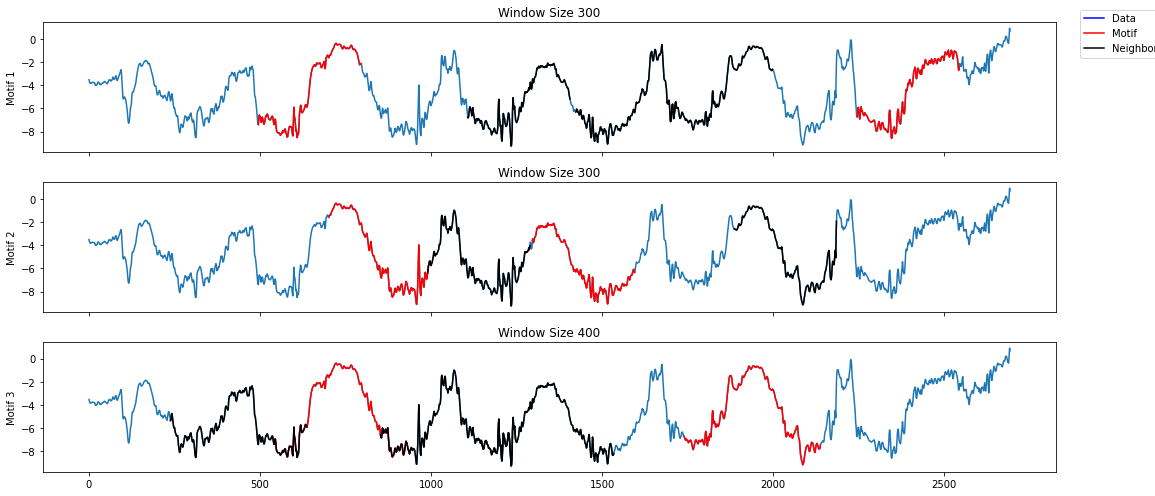

In [14]:
# run analyze on all cpu cores
_ = compute_and_visualize_motifs(acceleration_data_frame['acceleration_x'].to_numpy(), windows=windows)

### Acceleration y

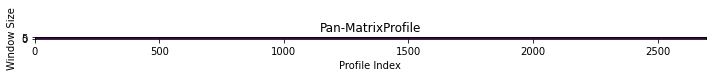

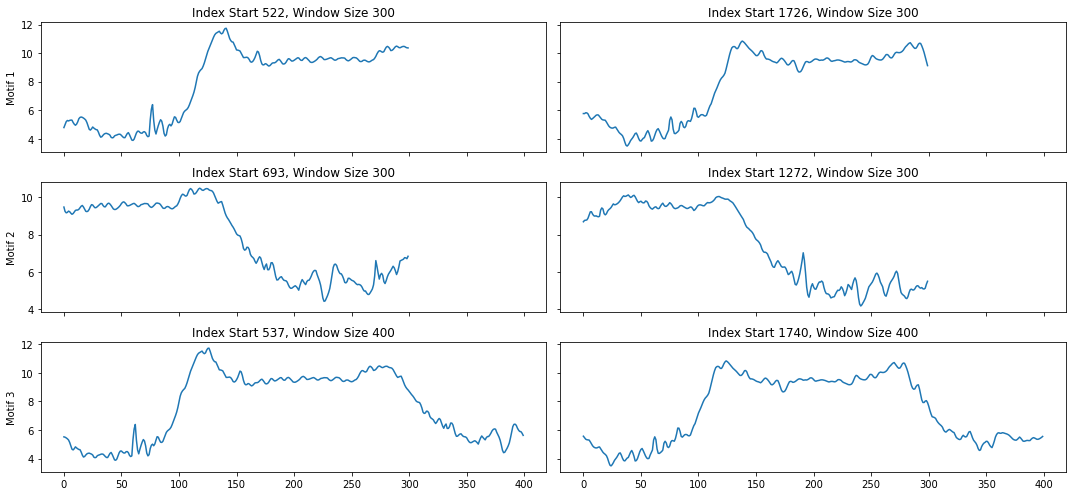

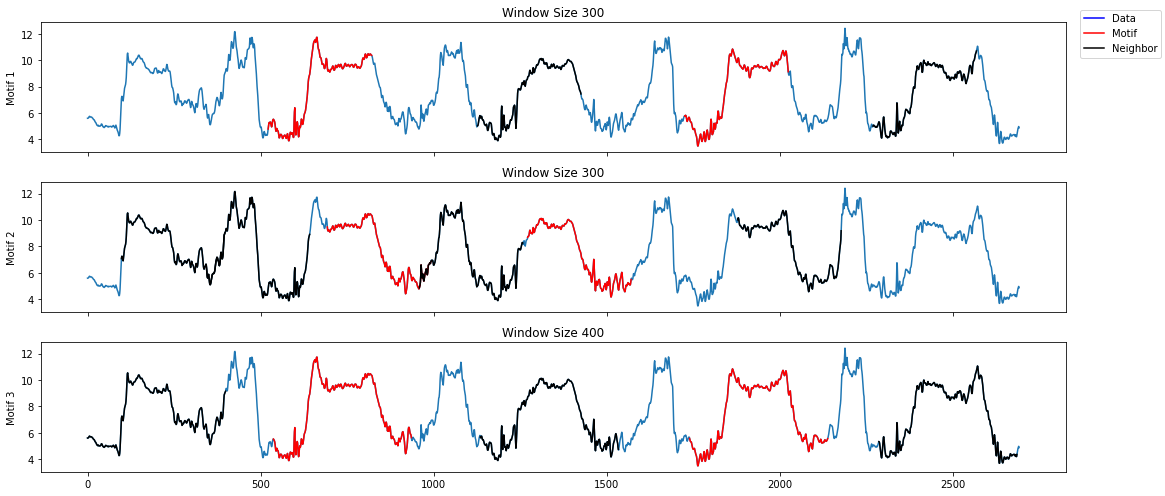

In [15]:
_ = compute_and_visualize_motifs(acceleration_data_frame['acceleration_y'].to_numpy(), windows=windows)

### Acceleration z

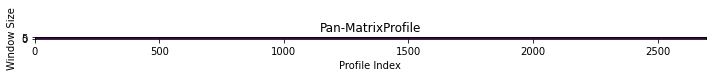

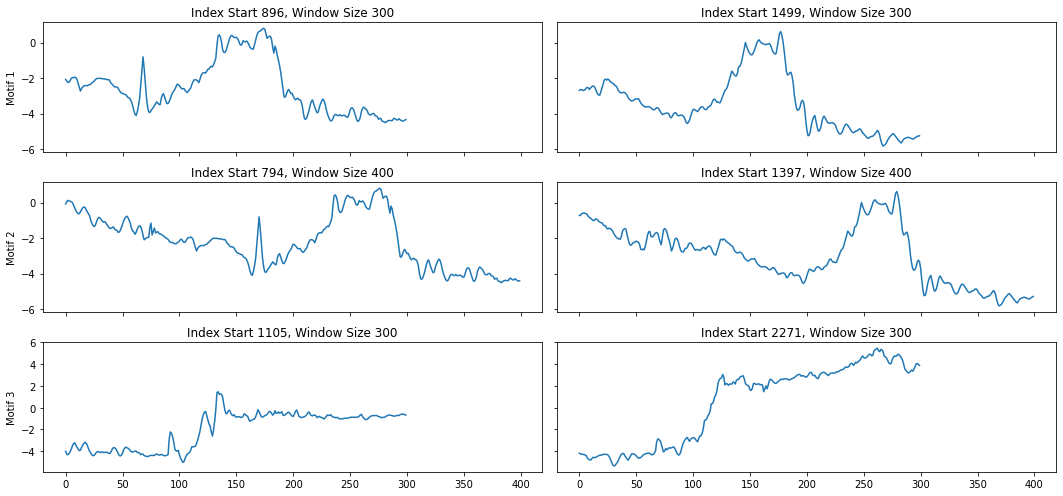

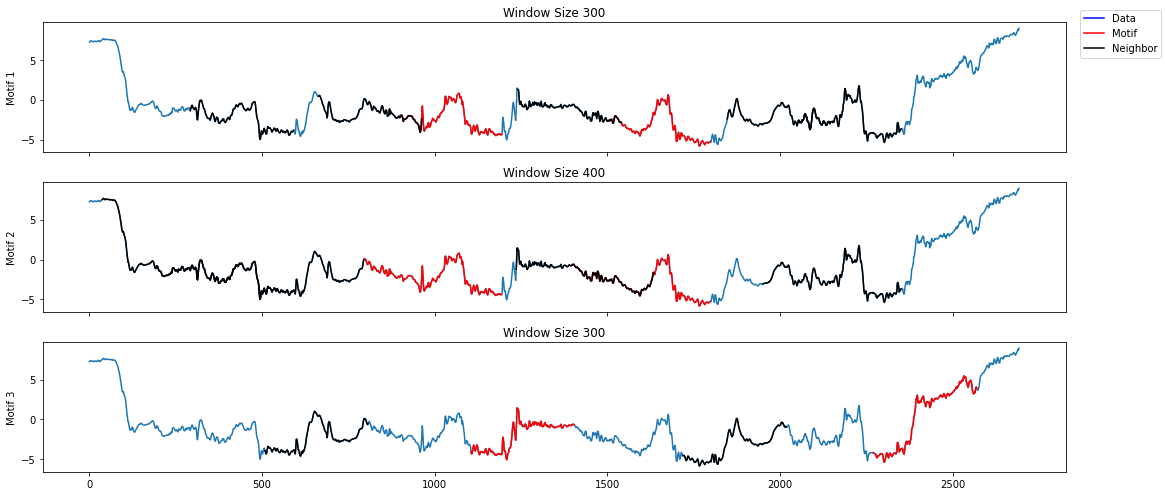

In [16]:
_ = compute_and_visualize_motifs(acceleration_data_frame['acceleration_z'].to_numpy(), windows=windows)

### Gyro x

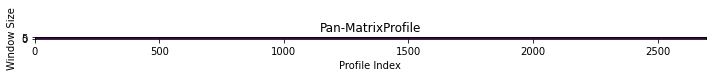

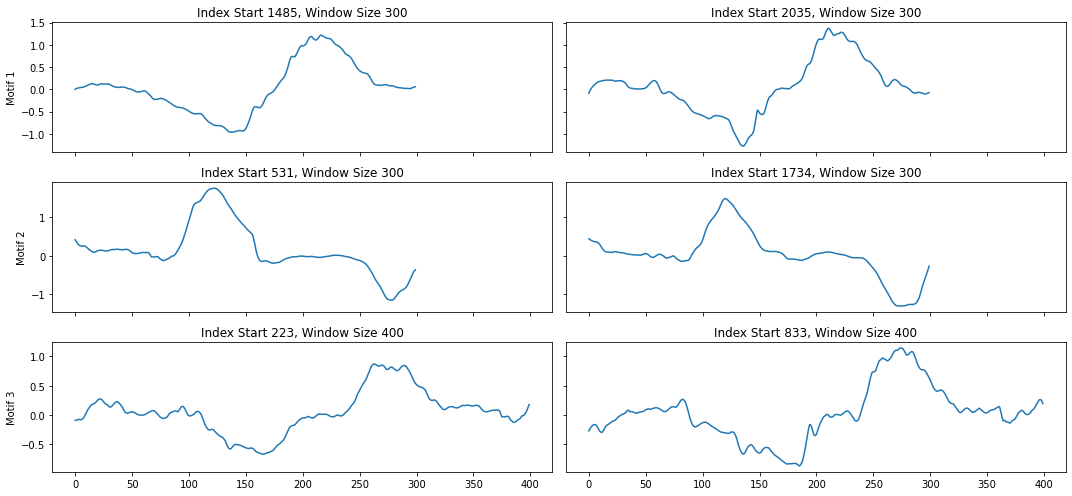

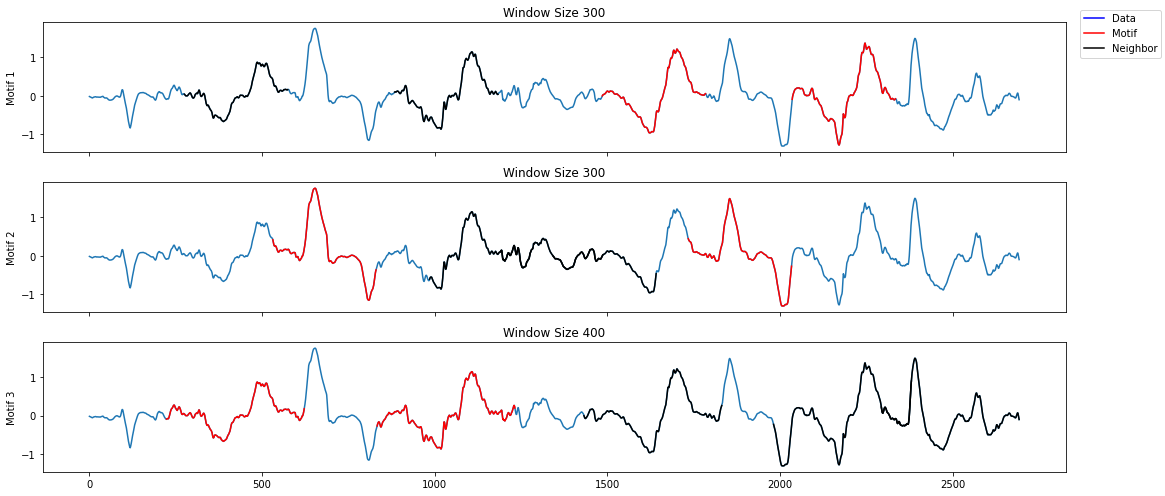

In [17]:
_ = compute_and_visualize_motifs(gyroscope_data_frame['gyroscope_x'].to_numpy(), windows=windows)

### Gyro y

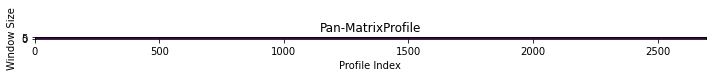

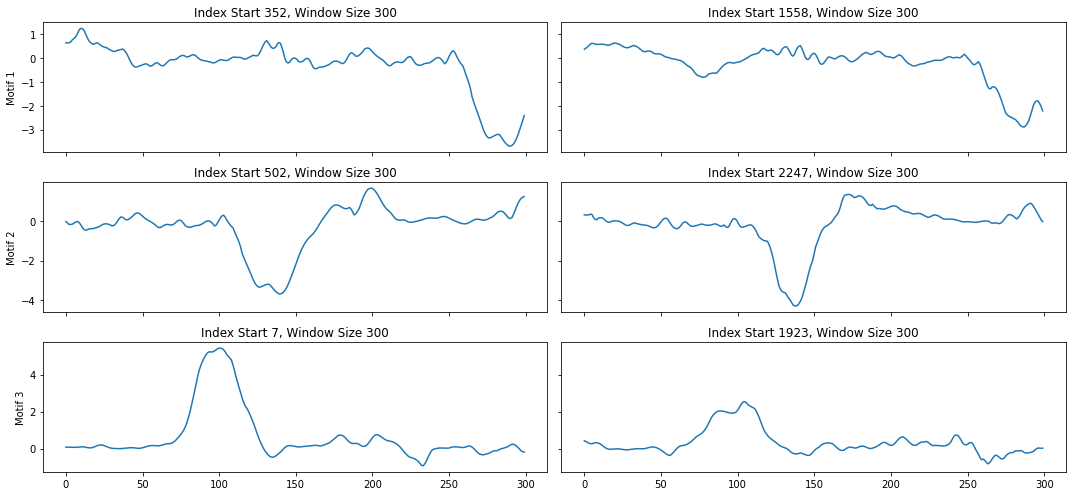

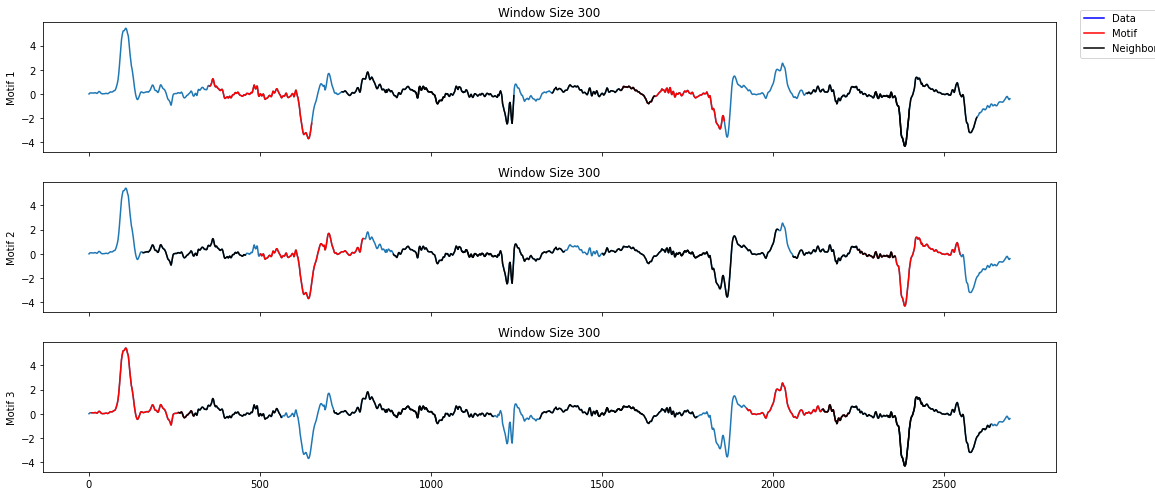

In [18]:
_ = compute_and_visualize_motifs(gyroscope_data_frame['gyroscope_y'].to_numpy(), windows=windows)

### Gyro z

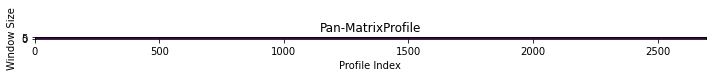

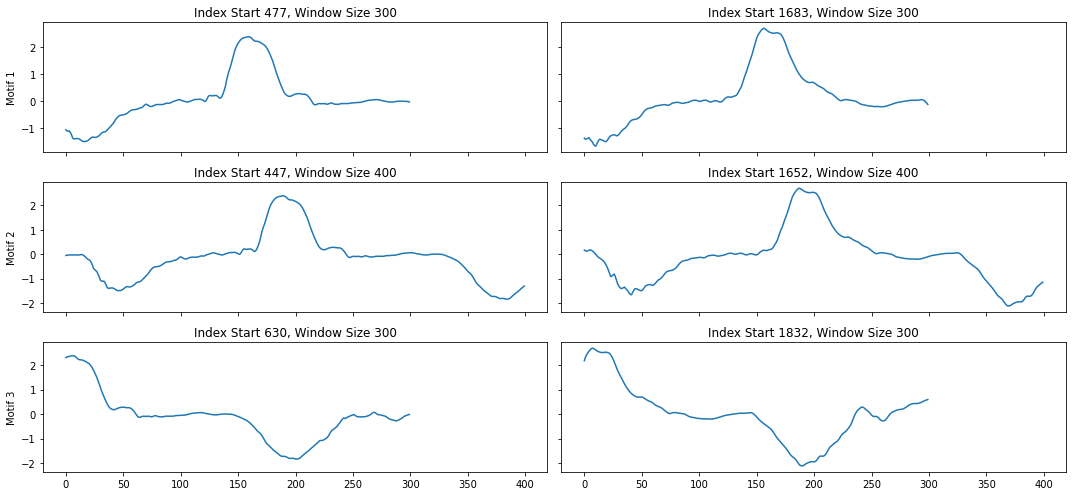

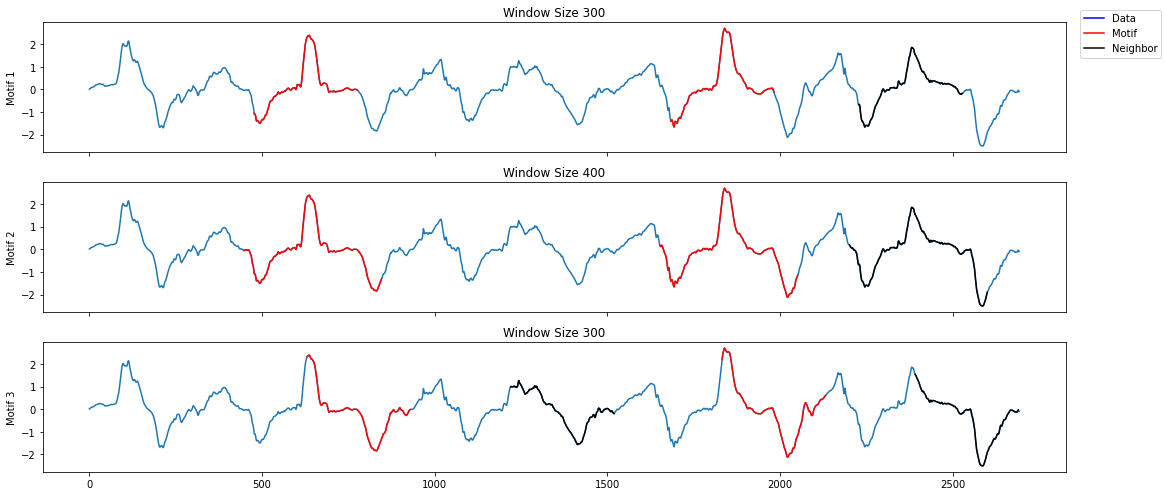

In [19]:
_ = compute_and_visualize_motifs(gyroscope_data_frame['gyroscope_z'].to_numpy(), windows=windows)

Now we've seen the plots for different univariate MPAs. To get a full recognition
on top of all data streams we need to reduce the dimensionality of the data. For now we use the mean of all acceleration streams.

### Accelerometer mean

4.666666666666667

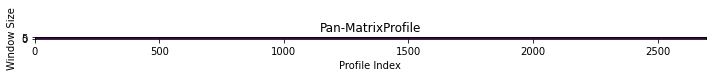

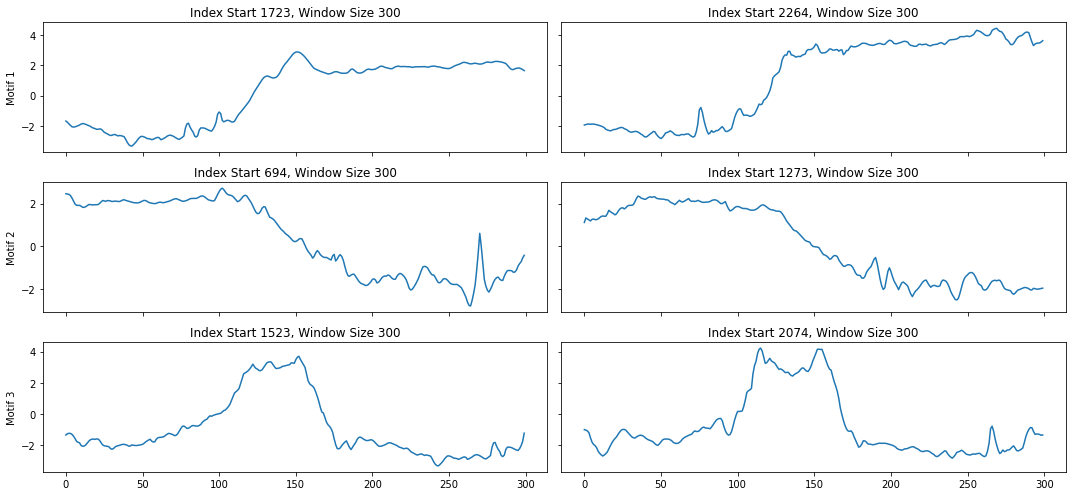

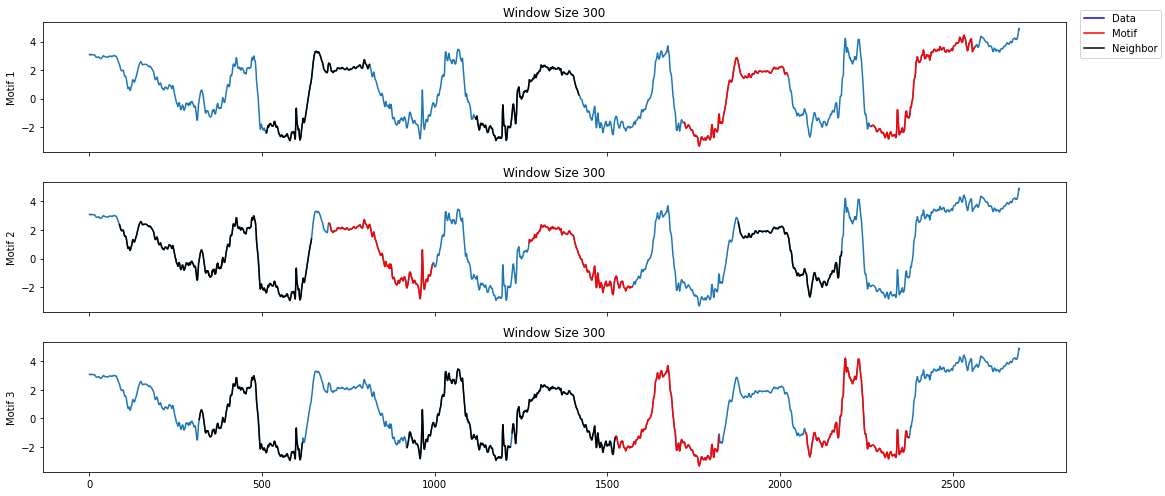

In [20]:
mean_coefficient_data_frame_acceleration = acceleration_data_frame.apply(np.mean, axis=1).to_frame()
profile_motifs = compute_and_visualize_motifs(mean_coefficient_data_frame_acceleration[0].to_numpy(), windows=windows)
motif_count_mean(profile_motifs)

### Gyro mean

11.333333333333334

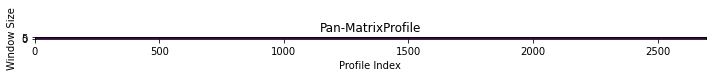

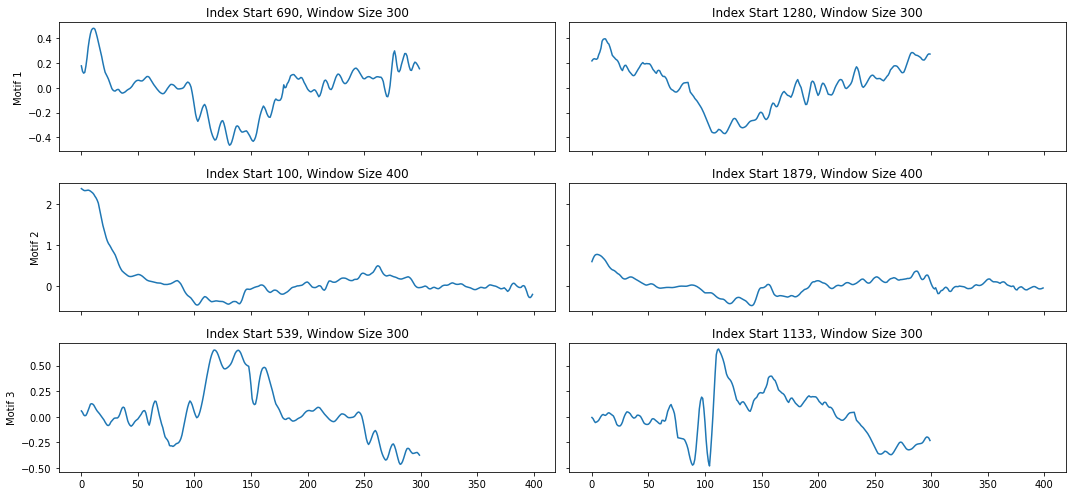

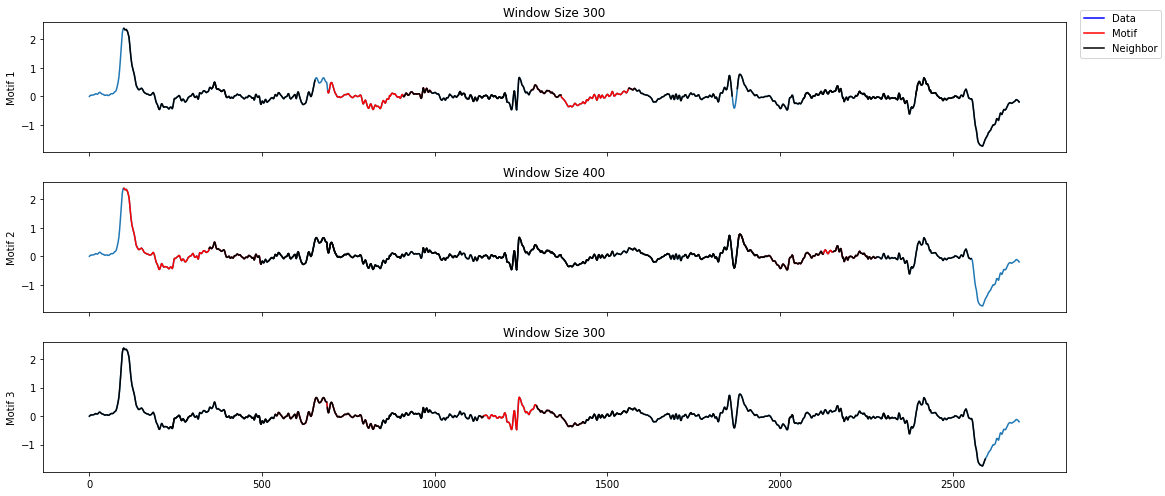

In [21]:
mean_coefficient_data_frame_gyro = gyroscope_data_frame.apply(np.mean, axis=1).to_frame()
profile_motifs = compute_and_visualize_motifs(mean_coefficient_data_frame_gyro[0].to_numpy(), windows=windows)
motif_count_mean(profile_motifs)

### Combined accelerometer and gyro mean

Repeated pattern occurs 4.8 times on average per motif


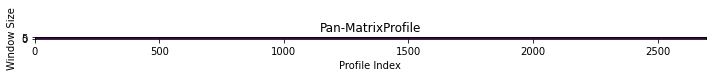

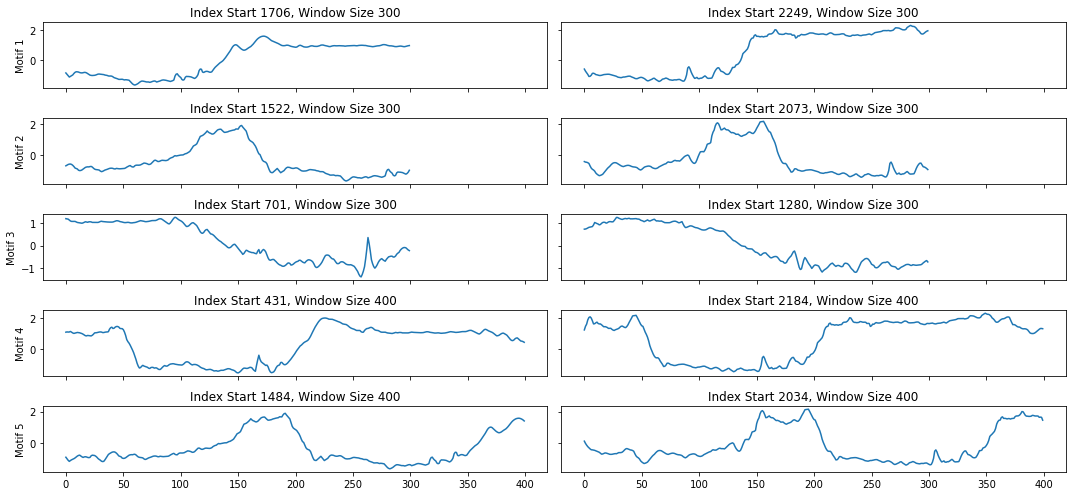

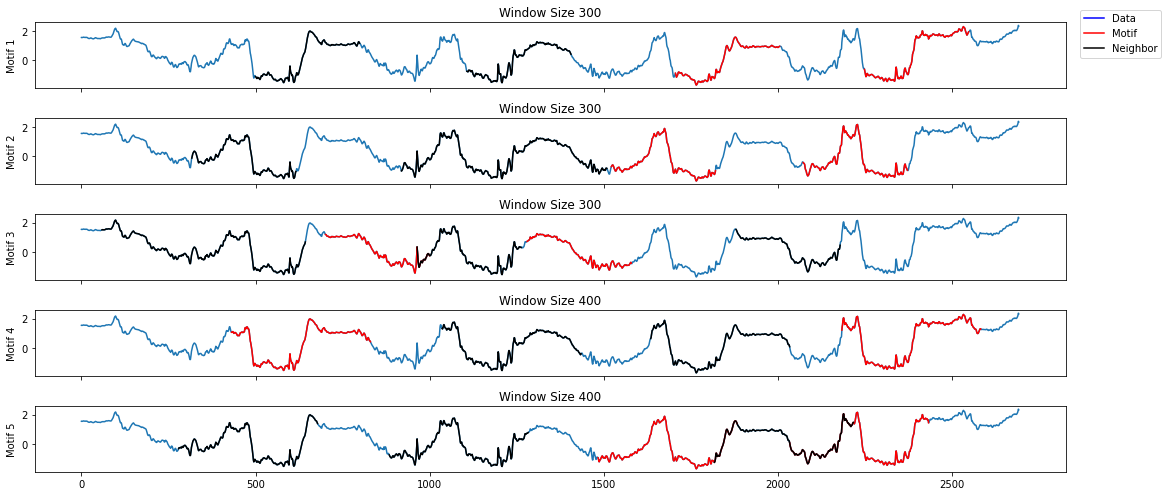

In [25]:
mean_coefficient_data_frame_all = pd.concat([gyroscope_data_frame,acceleration_data_frame], axis=1).apply(np.mean, axis=1).to_frame()
profile_motifs = compute_and_visualize_motifs(mean_coefficient_data_frame_all[0].to_numpy(), windows=windows, k=5)

print("Repeated pattern occurs {} times on average per motif".format(motif_count_mean(profile_motifs)))